In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns

%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [57]:
def getImage(path, zoom=0.15):
    return OffsetImage(plt.imread(path), zoom=zoom)

In [4]:
self_sufficiency_ratio = pd.read_csv(
    "./data/United_Kingdom_Food_Security_Reports_2021_csv_files_16dec2021/2.1.1aProductiontoSupplyRatio.csv"
).dropna()

In [5]:
self_sufficiency_ratio.Year = pd.to_numeric(self_sufficiency_ratio.Year.str[:4])

In [6]:
self_sufficiency_ratio = self_sufficiency_ratio.set_index(["Year", "Category"]).unstack(
    "Category"
)
self_sufficiency_ratio.columns = ["All food", "Indigenous type food"]

<AxesSubplot:xlabel='Year'>

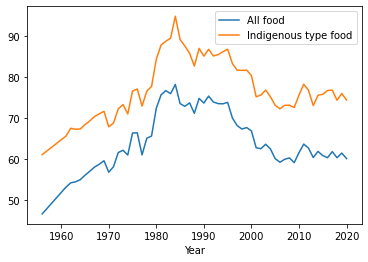

In [7]:
self_sufficiency_ratio.plot()

In [8]:
def reshape_df(df_raw_categories):
    # Get non year value
    category = df_raw_categories.drop(
        ["Year", "Production to supply ratio (%)"], axis=1
    ).columns[0]
    # get future column names
    column_names = df_raw_categories[category].drop_duplicates().to_list()
    # set index and unstack
    df_cat_cols = df_raw_categories.set_index(
        df_raw_categories.drop(
            "Production to supply ratio (%)", axis=1
        ).columns.to_list()
    ).unstack(category)
    # rename columns
    df_cat_cols.columns = column_names
    return df_cat_cols

In [9]:
self_sufficiency_ratio_meat = pd.read_csv(
    "./data/United_Kingdom_Food_Security_Reports_2021_csv_files_16dec2021/2.1.7bMeatPercentageOfConsumption.csv"
).dropna()
df_meat_self_suff = reshape_df(self_sufficiency_ratio_meat)

self_sufficiency_ratio_cereal = pd.read_csv(
    "./data/United_Kingdom_Food_Security_Reports_2021_csv_files_16dec2021/2.1.6bCropPercentageOfConsumption.csv"
).dropna()
df_cereal_self_suff = reshape_df(self_sufficiency_ratio_cereal)

self_sufficiency_ratio_summary = pd.read_csv(
    "./data/United_Kingdom_Food_Security_Reports_2021_csv_files_16dec2021/2.1.8bCropPercentageOfConsumption.csv"
).dropna()
df_summary_self_suff = reshape_df(self_sufficiency_ratio_summary)

self_sufficiency_ratio_veg = pd.read_csv(
    "./data/United_Kingdom_Food_Security_Reports_2021_csv_files_16dec2021/2.1.8dVegPercentageOfConsumption.csv"
).dropna()
df_veg_self_suff = reshape_df(self_sufficiency_ratio_veg)

self_sufficiency_ratio_fruit = pd.read_csv(
    "./data/United_Kingdom_Food_Security_Reports_2021_csv_files_16dec2021/2.1.8fFruitPercentageOfConsumption.csv"
).dropna()
df_fruit_self_suff = reshape_df(self_sufficiency_ratio_fruit)

In [25]:
df_all_categories = pd.concat(
    [
        self_sufficiency_ratio,
        df_summary_self_suff,
        df_meat_self_suff,
        df_cereal_self_suff,
        df_veg_self_suff,
        df_fruit_self_suff,
    ],
    axis=1,
)
df_all_categories.shape

(65, 27)

In [27]:
df_all_categories.columns

Index(['All food', 'Indigenous type food', 'Oil seed', 'Sugar',
       'Fresh vegetables', 'Potatoes', 'Fresh fruit', 'Beef', 'Pigmeat',
       'Lamb', 'Poultry', 'Wheat (all)', 'Wheat (milling)', 'Barley', 'Oats',
       'All', 'Cabbages', 'Cauliflowers and broccoli',
       'Carrots, turnips,\nand swedes', 'Mushrooms', 'Lettuce', 'Tomatoes',
       'Apples', 'Pears', 'Plums', 'Strawberries', 'Raspberries'],
      dtype='object')

In [33]:
df_all_categories.drop(list(range(df_all_categories.index.min(), 1990)), inplace=True)
df_all_categories = df_all_categories.iloc[::10, :]

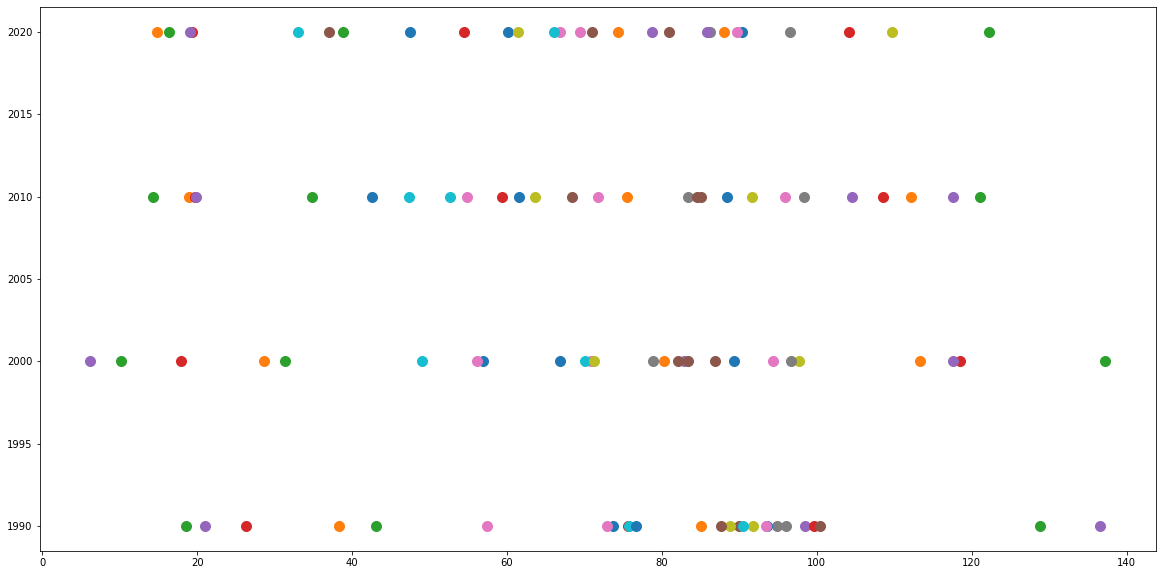

In [12]:
# create scatter plot
fig, ax = plt.subplots(figsize=(20, 10))
for col in df_all_categories.columns:

    ax.scatter(
        df_all_categories[col].values,
        df_all_categories.index,
        s=100,
        marker="o",
    )

plt.show()

In [77]:
df_selected_cats = df_all_categories[
    [
        # "All food",
        "Indigenous type food",
        "Sugar",
        "Fresh vegetables",
        "Fresh fruit",
        "Beef",
        "Pigmeat",
        "Lamb",
        "Poultry",
        "Wheat (all)",
    ]
]

pics = [
    "./data/UK_flag.png",
    "./data/sugar_cubes.png",
    "./data/veg.png",
    "./data/berries.png",
    "./data/cow.png",
    "./data/pig.png",
    "./data/lamb.png",
    "./data/chicken.png",
    "./data/wheat.png",
]
zoom = [0.15, 0.24, 0.2, 0.26, 0.24, 0.16, 0.15, 0.18, 0.32]

Indiginous food is [defined](https://hansard.parliament.uk/Commons/1984-03-27/debates/31709104-8854-4397-bd08-63c19e010533/IndigenousTypeFoods) as: Value of home production (less the cost of net imports of feed, seeds and livestock) as a percentage of all indigenous-type food consumed in the United Kingdom.

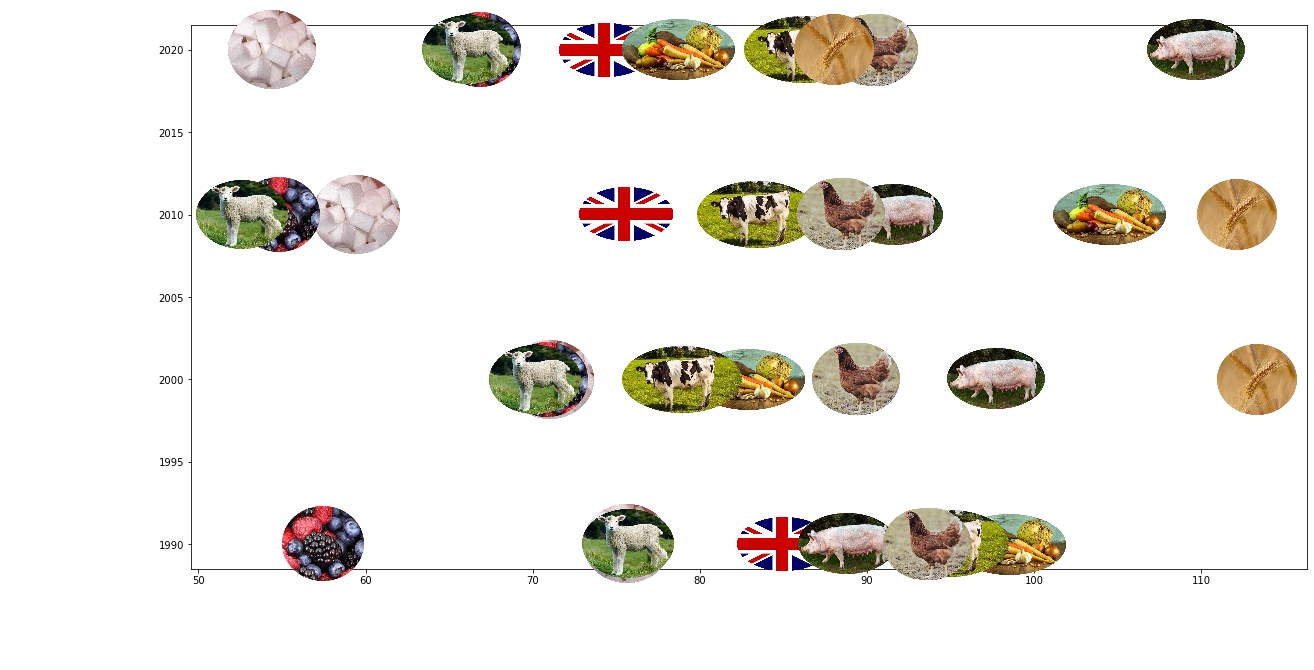

In [78]:
fig, ax = plt.subplots(figsize=(20, 10))
for col, pic, z in zip(df_selected_cats.columns, pics, zoom):
    x = df_selected_cats[col].values
    y = df_selected_cats.index
    ax.scatter(x, y)

    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(
            getImage(pic, zoom=z),
            (x0, y0),
            frameon=False,
        )
        ax.add_artist(ab)

plt.show()

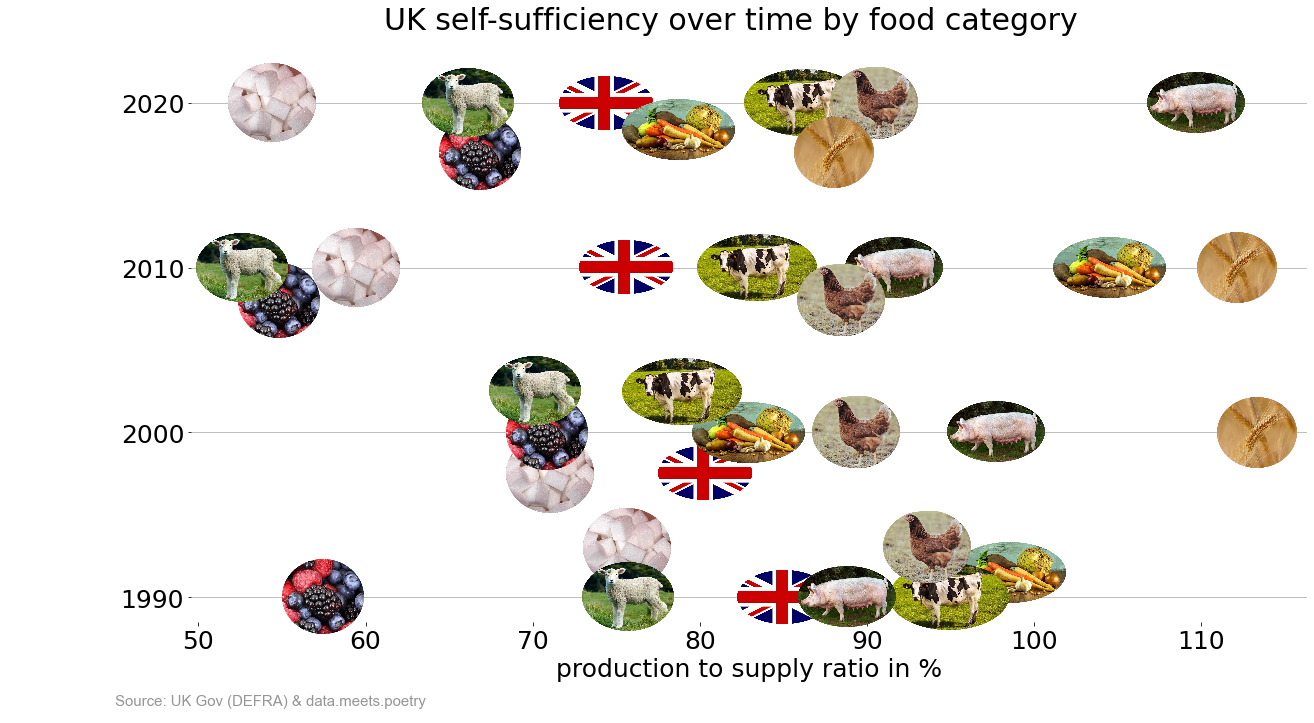

In [136]:
fig, ax = plt.subplots(figsize=(20, 10))
for col, pic, z in zip(df_selected_cats.columns, pics, zoom):
    x = df_selected_cats[col].values
    y = df_selected_cats.index
    ax.scatter(x, y, c="white")
    # jitter_dots(dots)

    for x0, y0 in zip(x, y):
        if (y0 == 2020) & ((col == "Fresh fruit") | (col == "Wheat (all)")):
            y0 -= 3
        if (y0 == 2020) & (col == "Fresh vegetables"):
            y0 -= 1.6
        if (y0 == 2010) & ((col == "Fresh fruit") | (col == "Poultry")):
            y0 -= 2
        if y0 == 2000:
            if (col == "Lamb") | (col == "Beef"):
                y0 += 2.5
            if (col == "Sugar") | (col == "Indigenous type food"):
                y0 -= 2.5
        if y0 == 1990:
            if (col == "Sugar") | (col == "Poultry"):
                y0 += 3
            if col == "Fresh vegetables":
                y0 += 1.5
        ab = AnnotationBbox(
            getImage(pic, zoom=z),
            (x0, y0),
            frameon=False,
        )
        ax.add_artist(ab)

# Make chart look pretty
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

plt.grid(axis="y")
plt.yticks(np.arange(min(y), max(y) + 1, 10))
fig.suptitle("UK self-sufficiency over time by food category", fontsize=30)
plt.xlabel("production to supply ratio in %", fontsize=25)
# set tick labels font size for both axes
plt.tick_params(axis="both", which="major", labelsize=25)
# Source
plt.text(
    x=0.18,
    y=0.01,
    s="Source: UK Gov (DEFRA) & data.meets.poetry",
    fontsize=15,
    fontname="Arial",
    color="#969696",
    ha="center",
    transform=fig.transFigure,
)
plt.show()